#classification
we are going to use perceptron classifier to classify fiven image of a number

In [1]:
import numpy as np
import os
import io
import warnings
#sklearn specific imports
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import Perceptron
from sklearn.metrics import hinge_loss
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix, precision_recall_curve
from sklearn.metrics import precision_score,recall_score,classification_report
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate, cross_val_predict,GridSearchCV
from pprint import pprint

#to plot
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
X,y = fetch_openml('mnist_784',version=1,return_X_y=True)
#returns data in the form of feature vector and a label

In [3]:
X = X.to_numpy()
y = y.to_numpy()

In [4]:
target_names = np.unique(y)
print('Number of samples: {0}, type:{1}'.format(X.shape[0],X.dtype))
print('Number of features:{0}'.format(X.shape[1]))
print('Minimum:{0},Maximun:{1}'.format(np.min(X),np.max(X)))
print('Number of classes:{0},type:{1}'.format(len(target_names),y.dtype))
print('Labels:{0}'.format(target_names))

Number of samples: 70000, type:float64
Number of features:784
Minimum:0.0,Maximun:255.0
Number of classes:10,type:object
Labels:['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']


In [5]:
X = MinMaxScaler().fit_transform(X)
print("Minimun:{0},Maximum:{1}".format(np.min(X),np.max(X)))
#See the output of this cell, we managed to transform the minimum value of the feature as 0 and maximum value of the feeature as 1.

Minimun:0.0,Maximum:1.0


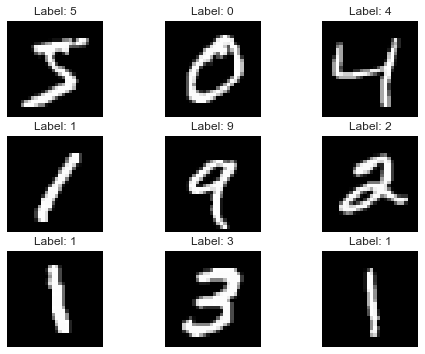

In [6]:
'''DAta visualization:
I did not understand how we did this'''
num_images = 9 # Choose a square number
factor = int(np.sqrt(num_images))
fig, ax = plt.subplots(nrows=factor, ncols= factor, figsize=(8,6))
idx_offset = 0
for i in range(factor):
    index =  idx_offset + i*(factor)
    for j in range(factor):
        ax[i,j].imshow(X[index+j].reshape(28,28), cmap='gray')
        ax[i,j].set_title(f'Label: {str(y[index+j])}')
        ax[i,j].set_axis_off()

In [7]:
X_train,X_test,y_train,y_test = X[:60000],X[60000:],y[:60000],y[60000:]

In [8]:
y_train_0 = -1*np.ones((len(y_train)))
y_test_0 = -1*np.ones((len(y_test)))
indx_0=np.where(y_train=='0')
y_train_0[indx_0]=1
indx_0=np.where(y_test=='0')
y_test_0[indx_0]=1